# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [109]:
import modin.pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [110]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [111]:
# 01 - Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, 
# time e net_bill.

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [112]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.64e-20
Time:                        17:21:06   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# 02. removendo as variáveis não signficantes 
y, X = patsy.dmatrices('tip ~ sex + net_bill', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           6.94e-22
Time:                        17:21:06   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218      0.000       0.973       1.703
sex[T.Female]    -0.0150      0.153     -0.098      0.922      -0.317       0.287
net_bill          0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

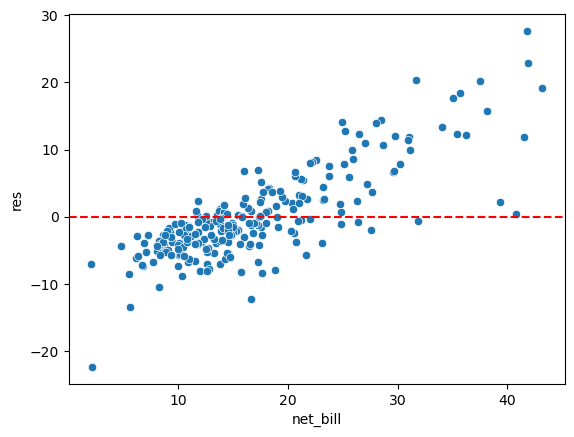

In [114]:
# 03. Observe o gráfico de resíduos em função de net_bill

reg = smf.ols('net_bill ~ sex + tip', data = tips).fit()
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.30
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           5.54e-19
Time:                        17:21:06   Log-Likelihood:                -382.39
No. Observations:                 244   AIC:                             770.8
Df Residuals:                     241   BIC:                             781.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2400      0.447  

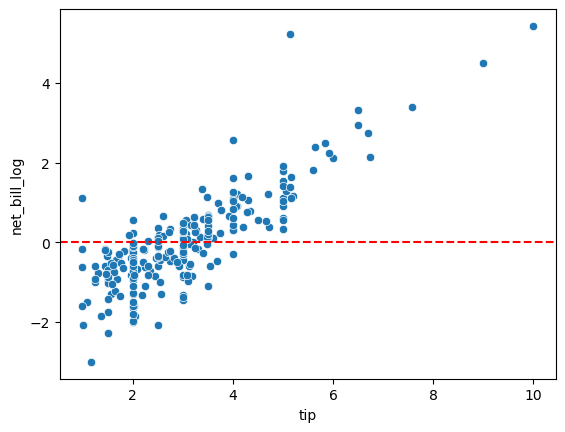

In [115]:
# 04. teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

reg_01 = smf.ols('tip ~ sex + np.log(net_bill)', data = tips).fit()
tips['net_bill_log'] = reg_01.resid

sns.scatterplot(x = 'tip', y = 'net_bill_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

print(reg_01.summary())

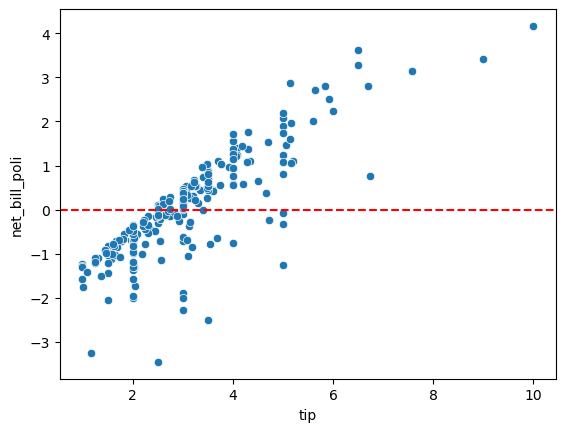

In [116]:

reg_02 = smf.ols('tip ~ sex + np.power(net_bill,2) ', data = tips).fit()
tips['net_bill_poli'] =  reg_02.resid

sns.scatterplot(x = 'tip', y = 'net_bill_poli', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [117]:
# 01. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip_pct, explicado por sex, 
# smoker, time e net_bill

y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [118]:
# 02. Remova as variáveis não significantes.

y, X = patsy.dmatrices('tip_pct ~ sex + net_bill', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     12.24
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           8.69e-06
Time:                        17:21:08   Log-Likelihood:                 108.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     241   BIC:                            -199.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3104      0.026     12.159      0.000       0.260       0.361
sex[T.Female]    -0.0102      0.021     -0.485      0.628      -0.052       0.031
net_bill         -0.0062      0.001     -4.941      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      467.453   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           231076.689
Skew:                          11.047   Prob(JB):                         0.00
Kurtosis:                     152.133   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

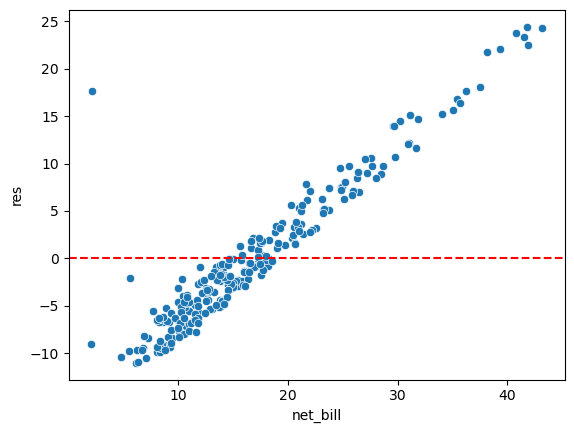

In [119]:
# 03. Observe o gráfico de resíduos em função de net_bill

reg = smf.ols('net_bill ~ sex + tip_pct', data = tips).fit()
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     30.99
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.05e-12
Time:                        17:21:17   Log-Likelihood:                 124.24
No. Observations:                 244   AIC:                            -242.5
Df Residuals:                     241   BIC:                            -232.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6321      0.056  

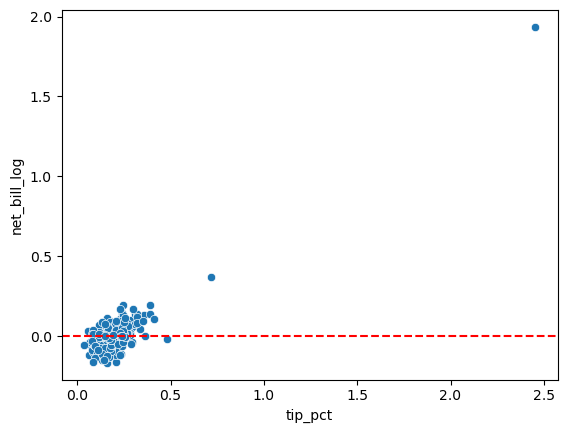

In [120]:
# 04. teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

reg_01 = smf.ols('tip_pct ~ sex + np.log(net_bill)', data = tips).fit()
tips['net_bill_log'] = reg_01.resid

sns.scatterplot(x = 'tip_pct', y = 'net_bill_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

print(reg_01.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     6.746
Date:                Tue, 14 Mar 2023   Prob (F-statistic):            0.00141
Time:                        17:21:18   Log-Likelihood:                 102.97
No. Observations:                 244   AIC:                            -199.9
Df Residuals:                     241   BIC:                            -189.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.24

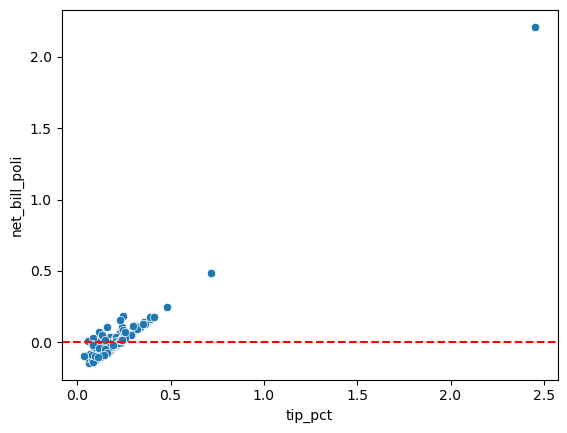

In [121]:
reg_02 = smf.ols('tip_pct ~ sex + np.power(net_bill,2) ', data = tips).fit()
tips['net_bill_poli'] =  reg_02.resid

sns.scatterplot(x = 'tip_pct', y = 'net_bill_poli', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

print(reg_02.summary())

In [122]:
# 05. Do modelo final deste item, calcule o  𝑅2, na escala de tip (sem o log).

modelo_final = smf.ols('tip ~ sex + np.power(net_bill, 2)', data=tips).fit()

print(f"𝑅2: {modelo_final.rsquared:.3f}")

𝑅2: 0.301


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [123]:
df = pd.read_csv('previsao_de_renda.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [124]:
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [125]:
# Verificar se há valores faltantes na base de dados
print(df.isnull().sum())

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64


<AxesSubplot:xlabel='tempo_emprego'>

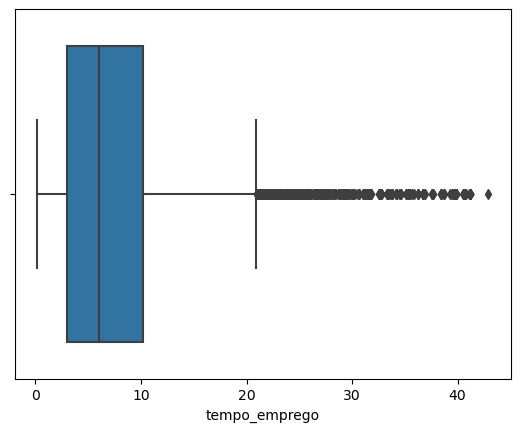

In [126]:
sns.boxplot(x=df['tempo_emprego'])

In [127]:
# Remover os outliers identificados
df = df[df['tempo_emprego'] <= 25]

<AxesSubplot:xlabel='tempo_emprego'>

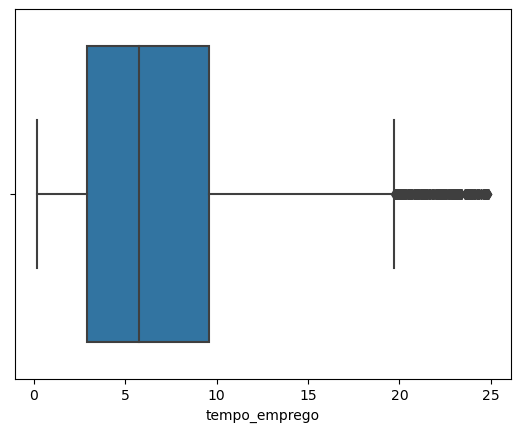

In [128]:
sns.boxplot(x=df['tempo_emprego'])

In [129]:
print(df.isnull().sum())

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64


In [130]:
model = smf.ols('renda ~ tempo_emprego', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1098.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.51e-230
Time:                        17:21:40   Log-Likelihood:            -1.1740e+05
No. Observations:               12056   AIC:                         2.348e+05
Df Residuals:                   12054   BIC:                         2.348e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2962.0490     61.393     48.248

eval_env: 1


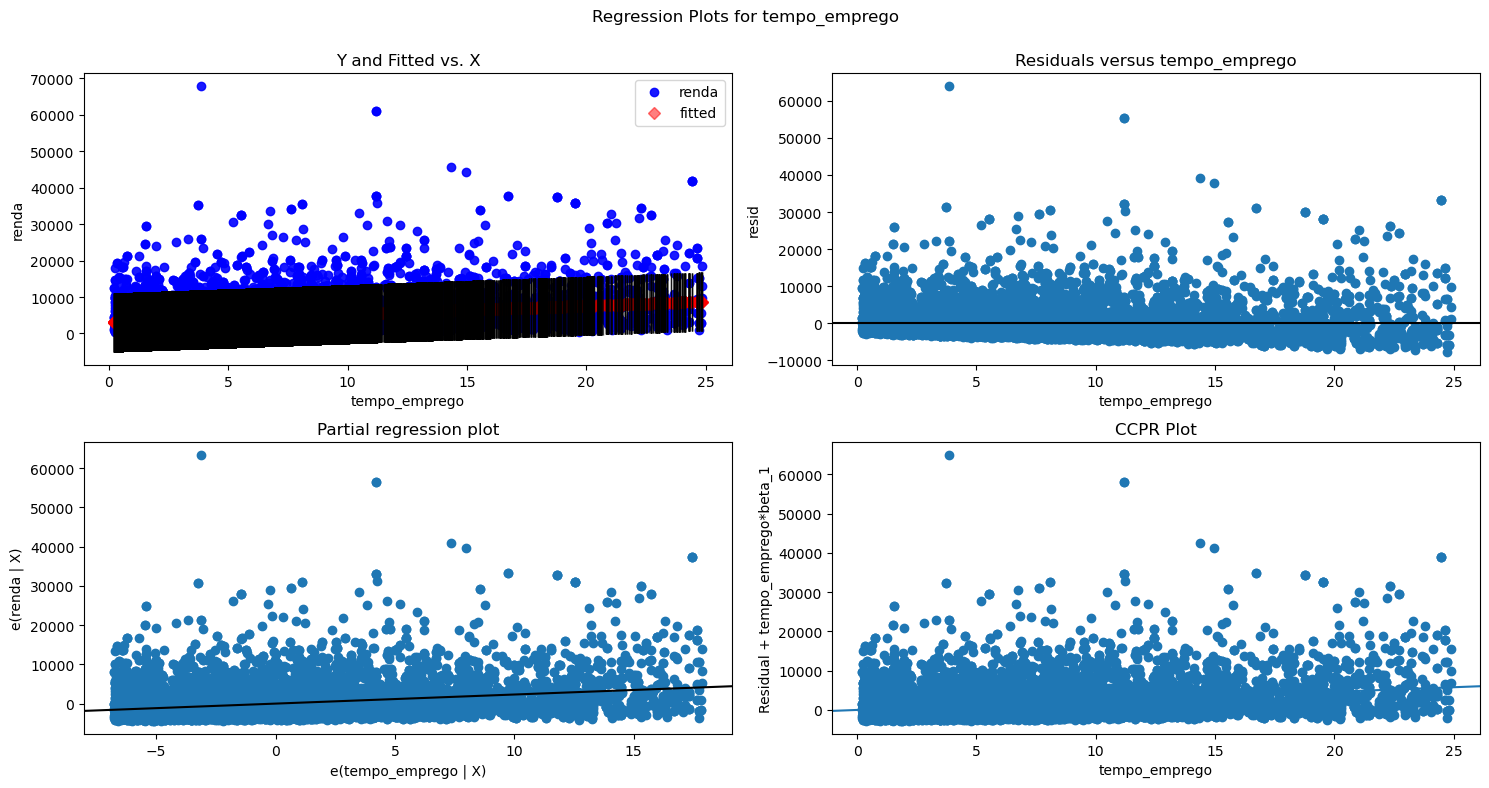

In [131]:
# 02. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
df['res'] = model.resid
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'tempo_emprego', fig=fig)
plt.show()

Poderia melhorra se incluir mais variáveis explicativas: pode ser que outras variáveis estejam influenciando a renda dos indivíduos, além do tempo de emprego. Por exemplo, idade, nível educacional, setor de atuação, entre outros. É importante avaliar se essas variáveis são relevantes e não causam multicolinearidade.


In [135]:
# 03. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) 
# de acordo com as demais variáveis.
reg_3 = smf.ols('''np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao
              + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau''', data = df).fit()
df['res_3'] = reg_3.resid

In [136]:
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:26:45   Log-Likelihood:                -12755.
No. Observations:               12056   AIC:                         2.556e+04
Df Residuals:                   12030   BIC:                         2.575e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2103      0.272     26.542      0.000       6.678       7.743
sexo[T.M]                            0.4793      0.014     33.358      0.000       0.451       0.507
posse_de_veiculo[T.True]            -0.0017      0.014     -0.125      0.901      -0.029       0.026
posse_de_imovel[T.True]              0.0880      0.014      6.402      0.000       0.061       0.115
tipo_renda[T.Bolsista]              -0.0453      0.349     -0.130      0.897      -0.730       0.639
tipo_renda[T.Empresário]             0.1778      0.015     12.041      0.000       0.149       0.207
tipo_renda[T.Pensionista]            0.4159      0.236      1.759      0.079      -0.048       0.879
tipo_renda[T.Servidor público]       0.0963      0.022      4.422      0.000       0.054       0.139
educacao[T.Pós graduação]            0.5470      0.175      3.122      0.002       0.204       0.890
educacao[T.Secundário]               0.0180      0.071      0.254      0.800      -0.121       0.157
educacao[T.Superior completo]        0.1112      0.071      1.561      0.119      -0.028       0.251
educacao[T.Superior incompleto]     -0.0153      0.077     -0.200      0.841      -0.165       0.135
estado_civil[T.Separado]            -0.0490      0.131     -0.374      0.708      -0.306       0.208
estado_civil[T.Solteiro]             0.0269      0.128      0.209      0.834      -0.225       0.279
estado_civil[T.União]               -0.0242      0.024     -1.023      0.306      -0.070       0.022
estado_civil[T.Viúvo]               -0.0314      0.135     -0.233      0.816      -0.295       0.233
tipo_residencia[T.Casa]              0.0150      0.053      0.281      0.779      -0.089       0.119
tipo_residencia[T.Com os pais]      -0.0564      0.060     -0.944      0.345      -0.174       0.061
tipo_residencia[T.Comunitário]       0.0600      0.103      0.584      0.559      -0.141       0.261
tipo_residencia[T.Estúdio]          -0.0644      0.090     -0.716      0.474      -0.241       0.112
tipo_residencia[T.Governamental]    -0.0587      0.065     -0.905      0.366      -0.186       0.068
mau[T.True]                         -0.0371      0.042     -0.889      0.374      -0.119       0.045
qtd_filhos                           0.0075      0.128      0.059      0.953      -0.243       0.259
idade                                0.0051      0.001      6.453      0.000       0.004       0.007
tempo_emprego                        0.0478      0.001     38.404      0.000       0.045       0.050
qt_pessoas_residencia                0.0086      0.128      0.067      0.946      -0.242       0.259
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   2.

In [137]:
# 04. Remova as variáveis não significantes e ajuste novamente o modelo
reg_4 = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + qtd_filhos + idade', data = df).fit()
df['res_4'] = reg_4.resid
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.53e-224
Time:                        17:26:49   Log-Likelihood:                -13578.
No. Observations:               12056   AIC:                         2.717e+04
Df Residuals:                   12051   BIC:                         2.720e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.4463      0.035    213.471      0.000       7.378       7.515
sexo[T.M]                   0.4306      0.014     30.289      0.000       0.403       0.458
posse_de_imovel[T.True]     0.0884      0.014      6.167      0.000       0.060       0.117
qtd_filhos                  0.0285      0.009      3.256      0.001       0.011       0.046
idade                       0.0110      0.001     14.155      0.000       0.009       0.013
==============================================================================
Omnibus:                        6.158   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.174
Skew:                           0.046   Prob(JB):                       0.0456
Kurtosis:                       3.061   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o P>|t| vemos que ficou bem ajustado!

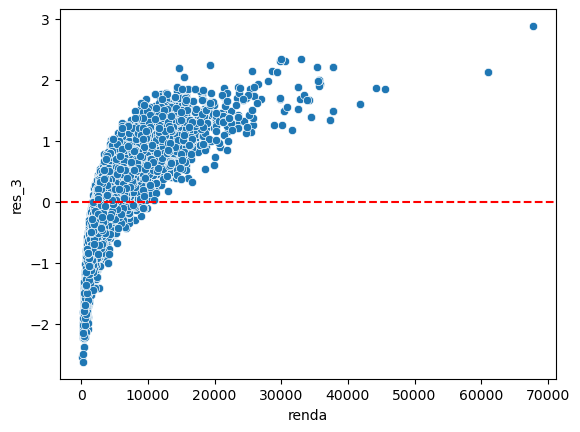

In [145]:
# 05. Faça uma análise de resíduos. Avalie a qualidade do ajuste.
sns.scatterplot(x = 'renda', y = 'res_3', data = df)
plt.axhline(y=0, color='r', linestyle='--')

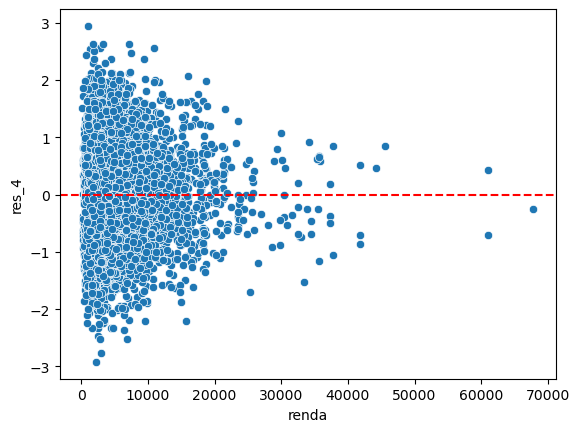

In [146]:
sns.scatterplot(x = 'renda', y = 'res_4', data = df)
plt.axhline(y=0, color='r', linestyle='--')

# Avaliando a qualidade do ajuste, percebi que o modelo reg_4 ficou relativamente melhor